# Python for spatial analysis

### Part 1 - Data structure and file reading

- vector data (geometry, projection)
- raster data (band information, projection, read as array)

In [1]:
import pandas as pd
import geopandas as gpd
from osgeo import gdal
import numpy as np

## 1. For vector data

### 1.1 Read files

Data in **geopandas** are organized as a form of **GeoDataFrame**, similar to Dataframe in pandas. It supports reading vector-based data including shpfile, geojson, zip files.

In [2]:
### read from shpfile
city = gpd.read_file('../Data/MIncome1018_Detroit.shp')
city.head()

,GeoID,STATE,COUNTY,TRACT,NAME,CENSUSAREA,Area(km2),Medi$2010,Medi$2011,Medi$2012,...,10/all,11/all,12/all,13/all,14/all,15/all,16/all,17/all,18/all,geometry
0,1400000US48029110100,48,029,110100,1101,1.364,3.541092,24922.0,26655.0,33491.0,...,0.413108,0.439272,0.545500,0.612352,0.617710,0.596572,0.660711,0.637850,0.639537,"POLYGON ((-98.49928 29.43383, -98.49915 29.433..."
1,1400000US48029110300,48,029,110300,1103,0.598,1.550426,20841.0,21898.0,23841.0,...,0.345461,0.360877,0.388322,0.383027,0.384987,0.582491,0.548292,0.587345,0.499071,"POLYGON ((-98.48687 29.40766, -98.48717 29.408..."
2,1400000US48029110500,48,029,110500,1105,0.450,1.265530,11172.0,11220.0,11010.0,...,0.185188,0.184904,0.179331,0.169393,0.160650,0.165264,0.185067,0.180664,0.164929,"POLYGON ((-98.51411 29.42050, -98.51383 29.422..."
3,1400000US48029120300,48,029,120300,1203,1.841,4.774709,104668.0,104125.0,105339.0,...,1.734982,1.715969,1.715759,1.760703,1.706257,1.900760,1.722757,1.935323,1.920976,"POLYGON ((-98.45928 29.48013, -98.45927 29.477..."
4,1400000US48029120702,48,029,120702,1207.02,1.246,3.277584,70878.0,69427.0,69783.0,...,1.174877,1.144150,1.136624,1.089929,1.068801,1.042352,1.087224,1.032510,0.996632,"POLYGON ((-98.48187 29.49117, -98.48161 29.492..."


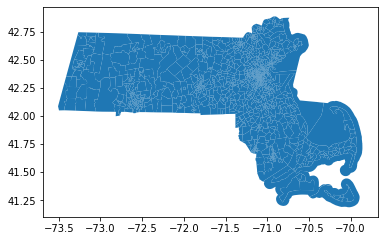

In [3]:
### read from geojson
city = gpd.read_file('../Data/census_tracts_data.geojson')
city.plot()

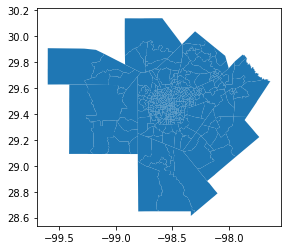

In [4]:
### read from zip
zipfile = "zip://../Data/Detroit_zip.zip!Detroit_zip"
city = gpd.read_file(zipfile)
city.plot()

To load subsets of data, we use 
- gpd.readfile(file, **mask=gdf_mask**), 
- gpd.readfile(file, **bbox=(-98.499279,29.432841,-98.50150099999999,29.433827)**), 
- gpd.readfile(file, **rows=10**) (begin from row #10), 
- gpd.readfile(file, **ignore_fields=[GeoID]**).

### 1.2 Data structure

A **GeoSeries**, an entry consist of several shapes, is referred as **'geometry'** column in the tubular data struture GeoDataFrame, including (multi)points, (multi)lines and (multi)polygons. The geometry information is provided in the form of WKT, for example:
- POINT (-98.49077 29.42664)
- POLYGON ((-98.499279 29.433827, -98.49914699999999 29.433812, -98.50150099999999 29.432841, -98.50051099999999 29.43326, -98.499279 29.433827))
- LINEARRING (-98.499279 29.433827, -98.50150099999999 29.432841, -98.50051099999999 29.43326, -98.499279 29.433827)

Almost its methods and attributes generalized from [Shapely](https://shapely.readthedocs.io/en/stable/). All the operations on geometry can be carried out for the GeoSeries. A full list of geometry attributes, methods, relationship detections can be found [here](https://geopandas.org/reference.html).

geometry
border


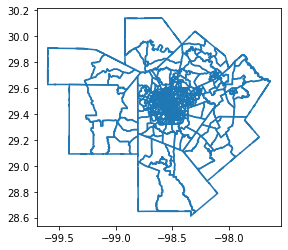

In [5]:
### find active geometry column
print(city.geometry.name) 
### we can also change the active geometry column by 'set_geometry'
city_border = city.copy()
city_border['border'] = city_border.boundary   # GeoSeries geometric operations
city_border = city_border.set_geometry('border')
print(city_border.geometry.name) 
city_border.plot()

geometry
center


/home/xxy/Environment/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


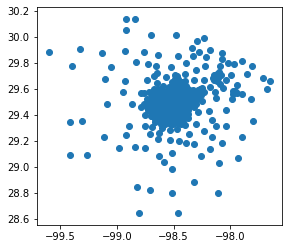

In [7]:
### find active geometry column
print(city.geometry.name) 
### we can also change the active geometry column by 'set_geometry'
city_center = city.copy()
city_center['center'] = city_center.centroid   
city_center = city_center.set_geometry('center')
print(city_center.geometry.name) 
city_center.plot()

## Note that there is a warning about the CRS, it is recommanded to re-project the geographic CRS (in lat-lon) to a projected CRS (in kilometers, etc.), 
## which we will introduce below.

In [8]:
### other methods for geometry, like:
city.bounds

,minx,miny,maxx,maxy
0,-98.501716,29.414208,-98.480469,29.438542
1,-98.489510,29.406772,-98.473246,29.422211
2,-98.515197,29.411245,-98.501687,29.422816
3,-98.481872,29.468201,-98.459238,29.496230
4,-98.481948,29.491166,-98.459060,29.508098
...,...,...,...,...
477,-98.585943,29.140744,-98.472448,29.265686
478,-98.744851,29.481816,-98.705364,29.505852
479,-97.965092,29.572481,-97.934906,29.599526
480,-98.656769,29.557734,-98.626289,29.572059


Other attributes not related to geometry, like income, population, temperature, etc., can be operated as in pandas. 

### 1.3 Projection

The Coordinate Reference System (CRS) tells Python how those coordinates relate to places on the Earth. 

At most time, data we get always include projection information.

In [9]:
# get projection information
city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

If not, we can use set_crs to help python to interpret the coordinate information, but ensure that you have geometry-related column to provide location information.
> city = city.set_crs(epsg='4326')

When we want to calculate distances and areas, it is better to re-project the latitude-longtitude information to kilometers. Due to map distortion, we need to choose the most suitable projection type. The 'geometry' column will change.

In [10]:
city_proj = city.to_crs(epsg=3395)

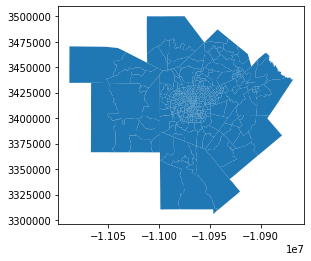

In [11]:
city_proj.plot()     # Note the x-y sticks.

geometry
center


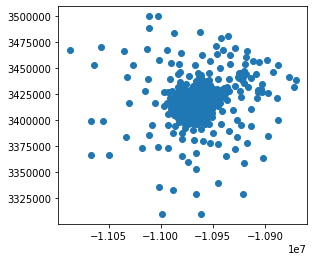

In [12]:
### NOW there will be no warning for center calculation
print(city_proj.geometry.name) 
### we can also change the active geometry column by 'set_geometry'
city_proj = city_proj.copy()
city_proj['center'] = city_proj.centroid   
city_proj = city_proj.set_geometry('center')
print(city_proj.geometry.name) 
city_proj.plot()

## 2. For raster data

### 2.1 Read files

In [13]:
dataset = gdal.Open('../Data/UHIDetroit_2010.tif', gdal.GA_ReadOnly)
### The second input indicating read/write, or read-only access to data. Values 'GA_ReadOnly'/0 means read only with no update, while 'GA_Update'/1 means read/write.

### 2.2 Data structure

The GDALDataset contains related raster bands with the same raster size and their geographical information. Find more details in [Raster Data Model](https://gdal.org/user/raster_data_model.html#raster-data-model).

- **Drivers:**

In [14]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))

Driver: GTiff/GeoTIFF


- **Data size**

In [15]:
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))

Size is 676 x 481 x 1


- **Projection**. The information of coordinate systems are in the format of WKT:

In [16]:
print("Projection is {}".format(dataset.GetProjection()))

Projection is GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


---- Detailed information in the GEOGCS:</br>
**GEOGCS["WGS 84",**     $\qquad$        # A geographic coordinate system name.<br/>
$\qquad \quad \ $**DATUM["WGS_1984",**  $\qquad$   # A datum identifier.<br/>
$\qquad \quad \quad $  **SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],** $\qquad$    # An ellipsoid name, semi-major axis, and inverse flattening.<br/>
$\qquad \quad \quad $  **AUTHORITY["EPSG","6326"]],**<br/>
$\qquad \quad \ $**PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],**  $\qquad$   # A prime meridian name and offset from Greenwich.<br/>
$\qquad \quad \ $**UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],** $\qquad$   # A units name, and conversion factor to meters or radians.<br/>
$\qquad \quad \ $**AXIS["Latitude",NORTH],**  $\qquad$   # Names and ordering for the axes.<br/>
$\qquad \quad \ $**AXIS["Longitude",EAST],**<br/>
$\qquad \quad \ $**AUTHORITY["EPSG","4326"]]**  $\qquad$   #Codes for most of the above in terms of predefined coordinate systems from authorities such as EPSG.<br/>

- **Affine geotransform**. It describe the relationship between raster positions (in pixel coordinates) and georeferenced coordinates. 

It commonly consists of six coefficient representing [X-axis geocoordinate (e.g. longtitude) of the top left corner, pixel width (geographic distance along X-axis for every pixel cell), affine coefficient 1, Y-axis geocoordinate (e.g. latitude) of the top left corner, pixel height (geographic distance along Y-axis for every pixel cell), affine coefficient 2]. If the image is north-up, the two affine coefficient are both 0.

We can calculate the projection coordinates (X, Y) in geographical space of any (R,C) pixel in raster space, as follows:
> X = cof[0] + C\*cof[1] + R\*cof[2]</br>
> Y = cof[3] + C\*cof[4] + R\*cof[5]

In [17]:
dataset.GetGeoTransform()

(-84.15776907745327,
 0.0026949458523585668,
 0.0,
 43.32664446836864,
 0.0,
 -0.002694945852358565)

In [19]:
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Origin = (-84.15776907745327, 43.32664446836864)
Pixel Size = (0.0026949458523585668, -0.002694945852358565)


### 2.3 Read raster band

Until now, the dataset is still a gdal.Dataset object. If we want to get the metadata and do some calculating, statistic, copying and rewriting operations, we can first read those bands, transfer the band data to arrays, which we are quite familiar.

In [20]:
### get one band
band = dataset.GetRasterBand(1)             # now the object is gdal.Band, with value type in Float32
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))

Band Type=Float32


Convert the band to easily-operated array by **ReadAsArray()** function. **BUT** one defect of this operation is that we can not ignore the NAN value, so necessary operations should be done to deal with the NAN problem. 

In [23]:
#### get predifined value representing no data
band.GetNoDataValue()

-999.0

In [24]:
bandarray = band.ReadAsArray()   # now the object is numpy.ndarray
bandarray[bandarray==-999] = np.nan
print(np.min(bandarray[~pd.isnull(bandarray)]), np.max(bandarray[~pd.isnull(bandarray)]))

-3.1464381 2.439222
